# Sentiment Analysis of Twitter

In [17]:
!pip install keras tensorflow


In [18]:
!pip install wordcloud

In [1]:
from tensorflow.keras.layers import Embedding

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.12.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import gensim.models.keyedvectors as word2vec
from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Conv1D, Dense, Flatten, MaxPooling1D, Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report


import logging


logging.basicConfig(format='%(asctime)s : %(levelname) s : %(message)s', level=logging.INFO)
np.random.seed(24)


df = pd.read_csv('training_twitter.csv', encoding='latin-1') 
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
import pandas as pd

columns = ['sentiment','ID', 'Timestamp', 'Query', 'Username', 'Tweets']

df = pd.read_csv('training_twitter.csv', names=columns, encoding='latin-1')  
print(df.head())

   sentiment          ID                     Timestamp     Query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

          Username                                             Tweets  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [5]:
df.head()

,sentiment,ID,Timestamp,Query,Username,Tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
print(df.columns)

Index(['sentiment', 'ID', 'Timestamp', 'Query', 'Username', 'Tweets'], dtype='object')


In [7]:
#Dropping the unnecessary columns
df = df.drop(['ID', 'Timestamp', 'Query', 'Username'], axis=1)

In [8]:
df.head()

,sentiment,Tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
print(df)

         sentiment                                             Tweets
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                0  is upset that he can't update his Facebook by ...
2                0  @Kenichan I dived many times for the ball. Man...
3                0    my whole body feels itchy and like its on fire 
4                0  @nationwideclass no, it's not behaving at all....
...            ...                                                ...
1599995          4  Just woke up. Having no school is the best fee...
1599996          4  TheWDB.com - Very cool to hear old Walt interv...
1599997          4  Are you ready for your MoJo Makeover? Ask me f...
1599998          4  Happy 38th Birthday to my boo of alll time!!! ...
1599999          4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


In [10]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
    return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

df.head()

,sentiment,Tweets
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

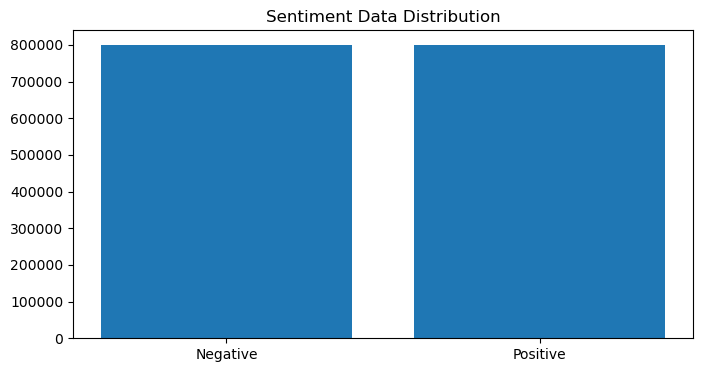

In [11]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [12]:
import random
random_idx_list = [random.randint(1,len(df.Tweets)) for i in range(10)]
df.loc[random_idx_list,:].head(10)

,sentiment,Tweets
383635,Negative,@nickybyrneoffic its crap weather in uk aswel so
40941,Negative,I'm in to much pain for this walking banter ...
1210401,Positive,@laFerocityPro Sweet! Car shopping is the sing...
451523,Negative,My TV needs to stop tormenting me with the GI ...
570694,Negative,our school has swine flu but were not closing
110375,Negative,Its raining
431255,Negative,I am totally craving smores right now. Ya. At ...
313041,Negative,You will be in my prayer's tonight Air France ...
641254,Negative,this vacation wont let me do programming
492920,Negative,@bayareabeer I am lost. Please help me find a ...


In [13]:
#Processing the text data
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [14]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
    return " ".join(tokens)

In [15]:
df.Tweets = df.Tweets.apply(lambda x: preprocess(x))


# Positive words

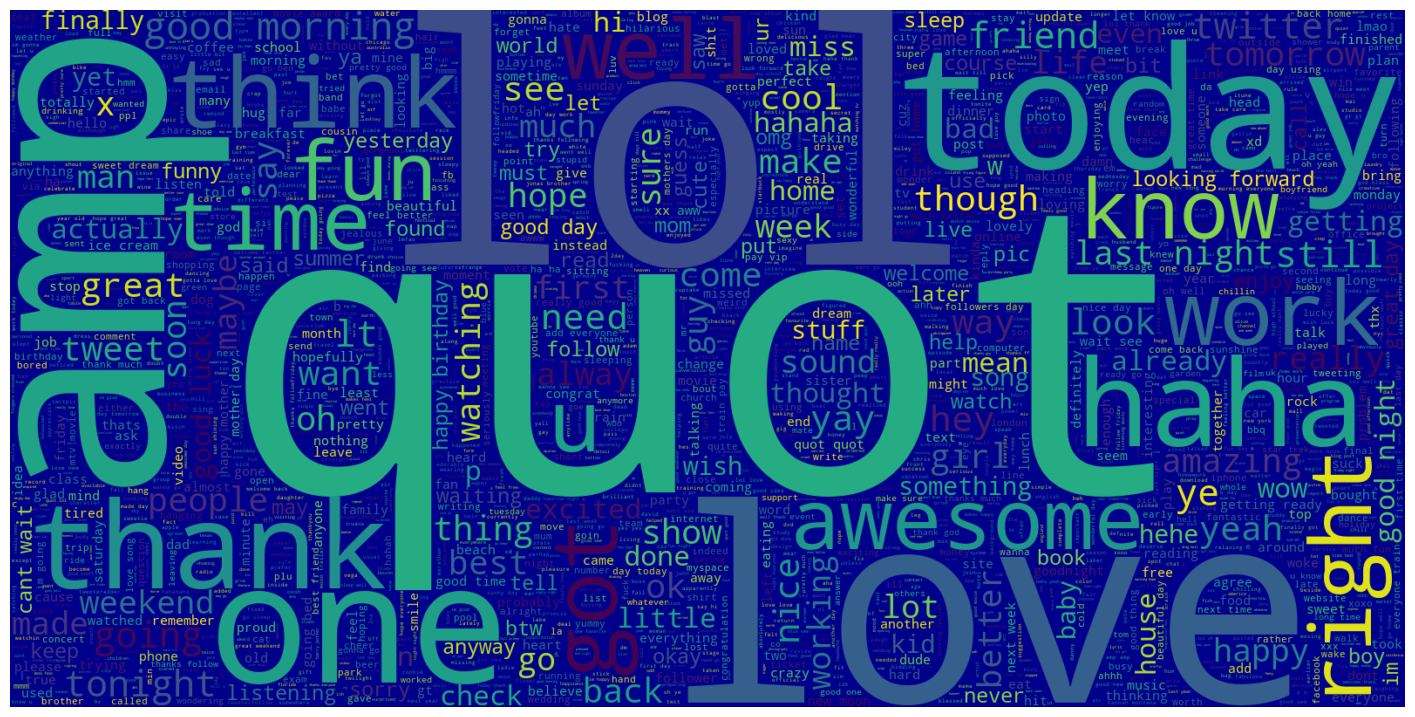

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_tweets = df[df.sentiment == 'Positive']['Tweets']
positive_text = " ".join(positive_tweets)
wordcloud = WordCloud(max_words=2000, width=1600, height=800, background_color='darkblue').generate(positive_text)

plt.figure(figsize=(18, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()


# Negative Words

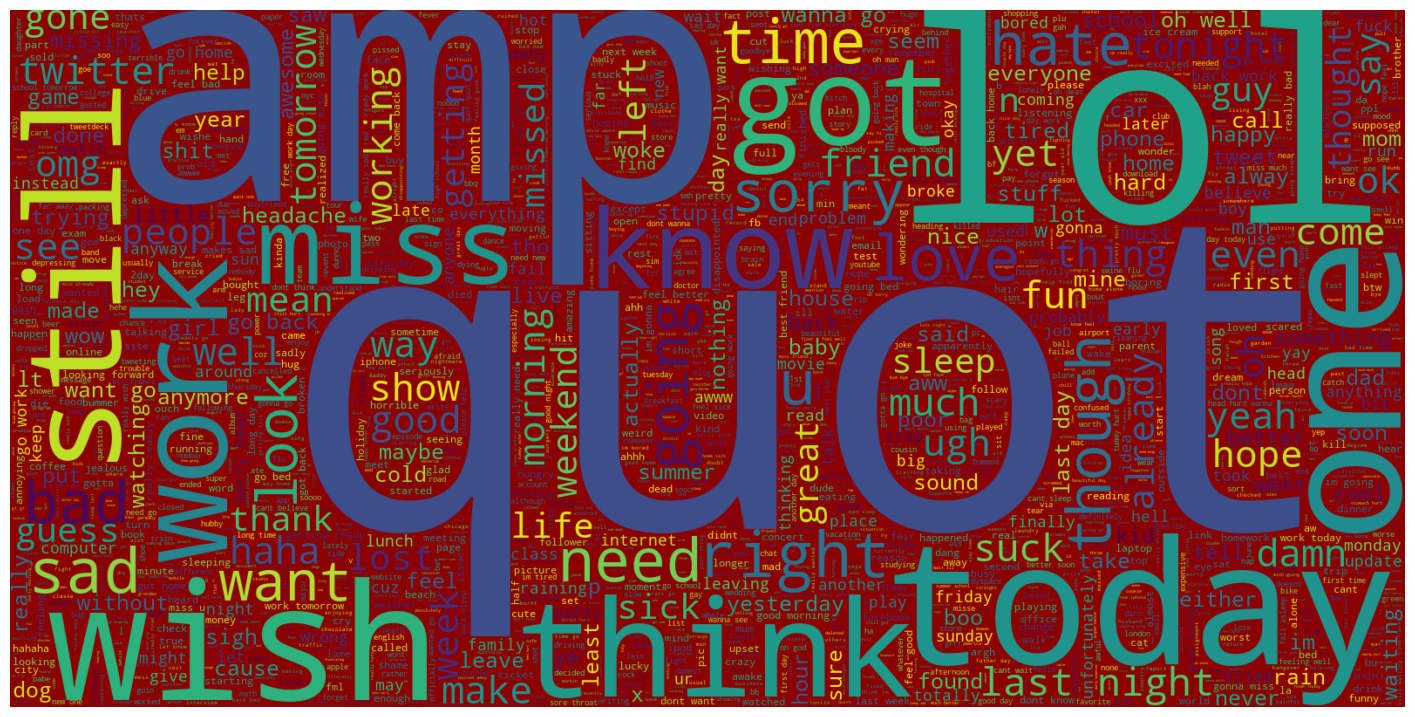

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

negative_tweets = df[df.sentiment == 'Negative']['Tweets']
negative_text = " ".join(negative_tweets)
wordcloud = WordCloud(max_words=2000, width=1600, height=800, background_color='darkred').generate(negative_text)

plt.figure(figsize=(18, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

# Splitting data into Train & Test data

In [19]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [20]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [21]:
train_data.head(10)


,sentiment,Tweets
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


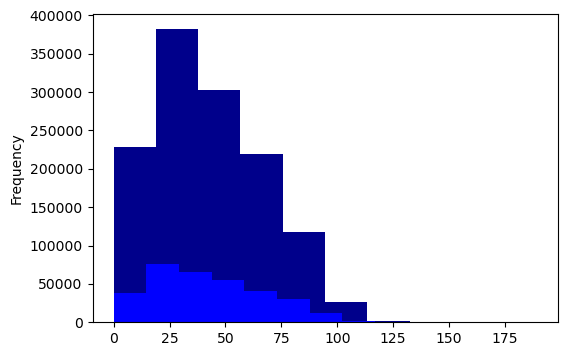

In [22]:
#Checking distribution of tweets in the data

length_train = train_data['Tweets'].str.len().plot.hist(color = 'darkblue', figsize = (6, 4))
length_test = test_data['Tweets'].str.len().plot.hist(color = 'blue', figsize = (6, 4))

# Most frequent occuring words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

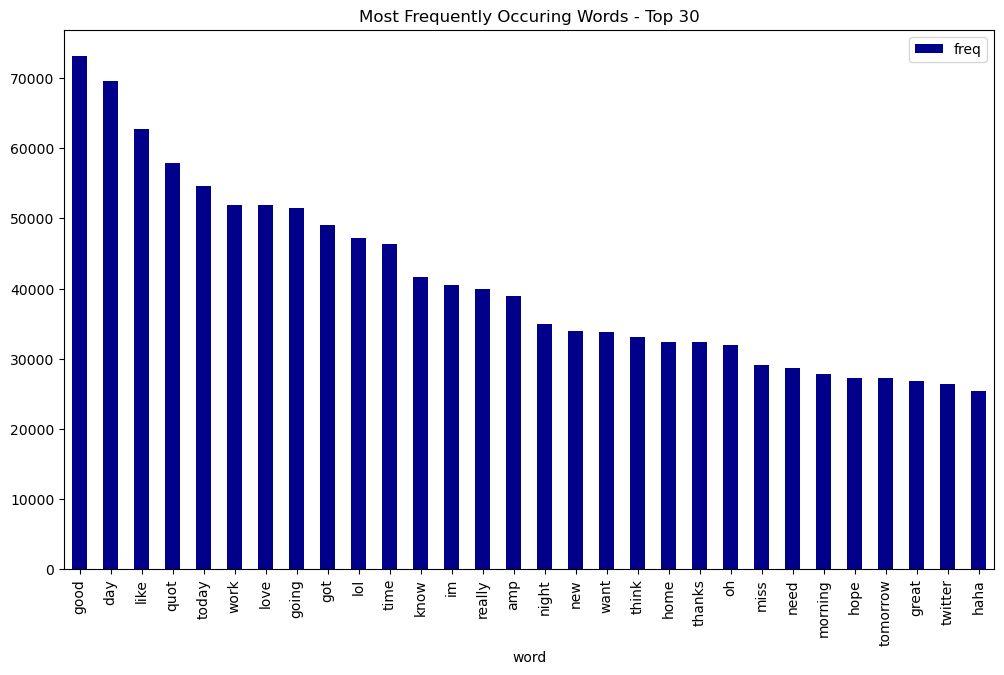

In [35]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.Tweets)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(12, 7), color = 'darkblue')
plt.title("Most Frequently Occuring Words - Top 30")


# Tokenizer

In [24]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Tweets)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Tweets),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Tweets),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [26]:
labels = train_data.sentiment.unique().tolist()


# Label encoding

In [27]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


# Word embedding

# Zip file extraction

In [51]:
import zipfile
import os

zip_file_path = r"C:\Users\pavit\anaconda3/glove.6B.zip"  
extracted_dir = r"C:\Users\pavit\anaconda3" 
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(extracted_dir)

In [53]:
GLOVE_EMB = r"C:\Users\pavit\anaconda3/glove.6B.300d.txt"
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = r"C:\Users\pavit\anaconda3/best_model.hdf5"

In [54]:
embeddings_index = {}

with open(GLOVE_EMB, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = value = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [55]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [56]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Build

In [58]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [46]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [59]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [60]:
print("Training on GPU...") if tf.config.list_physical_devices('GPU') else print("Training on CPU...")


Training on CPU...


In [61]:
#Training the model
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 2575s 2s/step - loss: 0.4885 - accuracy: 0.7614 - val_loss: 0.4730 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 2791s 2s/step - loss: 0.4778 - accuracy: 0.7689 - val_loss: 0.4694 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 3135s 3s/step - loss: 0.4712 - accuracy: 0.7730 - val_loss: 0.4637 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 3619s 3s/step - loss: 0.4669 - accuracy: 0.7756 - val_loss: 0.4608 - val_accuracy: 0.7799 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 2903s 2s/step - loss: 0.4634 - accuracy: 0.7780 - val_loss: 0.4601 - val_accuracy: 0.7803 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 2940s 2s/step - loss: 0.4606 - accuracy: 0.7795 - val_loss: 0.4583 - val_accuracy: 0.7810 - lr: 0.0010
Epoch 7/10
1250/1250 [========================

# Model Evaluation & Visualization

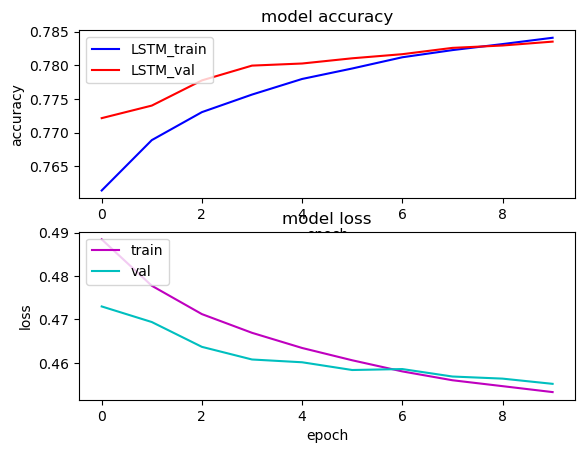

In [63]:
#Plotting model's training and validation accuracy
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [64]:
#Calculating the sentiment score
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 50s 2s/step


In [65]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

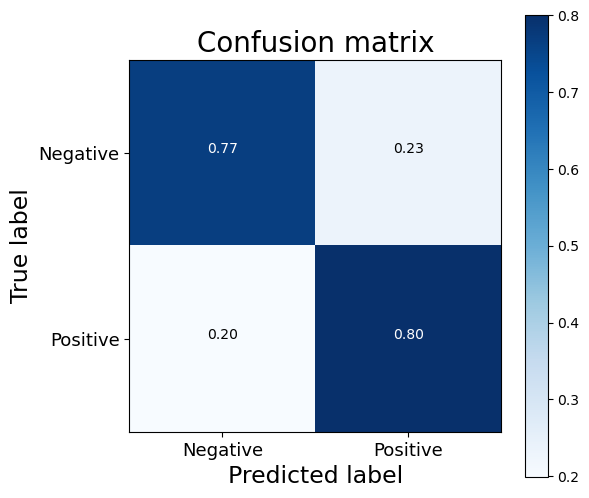

In [66]:
#Confusion Matrix
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [67]:
#Classification Report
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78    160542
    Positive       0.77      0.80      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



10000/10000 [==============================] - 485s 48ms/step


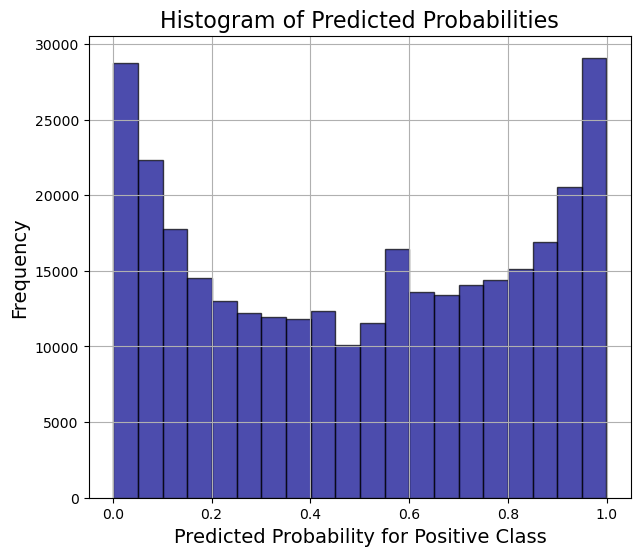

In [74]:
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test)

# Plot a histogram of predicted probabilities
plt.figure(figsize=(7, 6))
plt.hist(y_pred_probs, bins=20, edgecolor='black', alpha=0.7, color='darkblue')
plt.title('Histogram of Predicted Probabilities', fontsize=16)
plt.xlabel('Predicted Probability for Positive Class', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

10000/10000 [==============================] - 447s 45ms/step


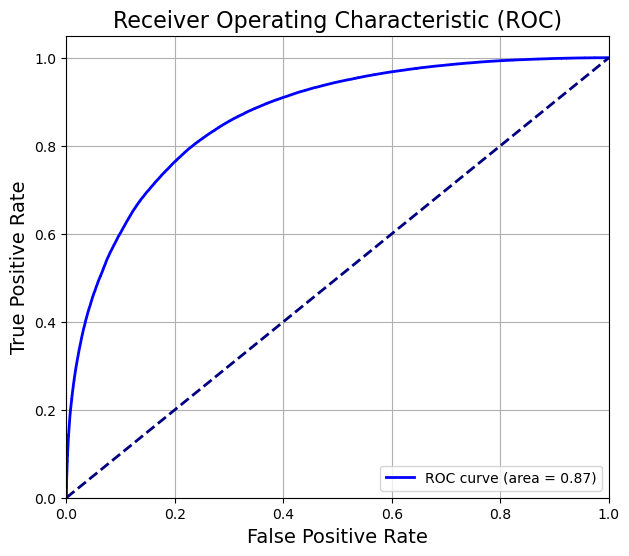

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

#ROC curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()